# Collect And Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
anime_data = pd.read_csv('Top_Anime_data.csv')

In [4]:
anime_data.head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [5]:
anime_data.columns

Index(['Score', 'Popularity', 'Rank', 'Members', 'Description', 'Synonyms',
       'Japanese', 'English', 'Type', 'Episodes', 'Status', 'Aired',
       'Premiered', 'Broadcast', 'Producers', 'Licensors', 'Studios', 'Source',
       'Genres', 'Demographic', 'Duration', 'Rating'],
      dtype='object')

In [6]:
anime_data.shape

(1000, 22)

# Summary Statistic and Data Types

In [8]:
anime_data.describe().style.background_gradient(cmap = 'Blues')

,Score,Popularity,Rank,Members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.156580,1805.637000,500.500000,223.648000
std,0.284344,1888.308553,288.819436,246.288299
min,7.800000,1.000000,1.000000,1.000000
25%,7.920000,413.750000,250.750000,31.750000
50%,8.100000,1139.500000,500.500000,132.000000
75%,8.312500,2633.750000,750.250000,330.000000
max,9.380000,12043.000000,1000.000000,998.000000


In [9]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

In [10]:
anime_data.nunique()

Score           121
Popularity     1000
Rank           1000
Members         481
Description     999
Synonyms        701
Japanese        953
English         856
Type              6
Episodes         84
Status            2
Aired           961
Premiered       129
Broadcast       184
Producers       641
Licensors        90
Studios         166
Source           15
Genres          237
Demographic       5
Duration        141
Rating            5
dtype: int64

# Dealing With Missing Values

In [12]:
anime_data.isnull().sum()

Score            0
Popularity       0
Rank             0
Members          0
Description      0
Synonyms       291
Japanese         1
English        141
Type             0
Episodes         0
Status           0
Aired            0
Premiered      431
Broadcast      431
Producers        0
Licensors        0
Studios          0
Source           0
Genres         229
Demographic    479
Duration         0
Rating           0
dtype: int64

In [13]:
#Create a copy of the df_anime
anime_data2 = anime_data.copy()

In [14]:
#replacing the NAN Values with English and Synonyms
anime_data2['Synonyms'].fillna(anime_data2['English'], inplace = True)
anime_data2['English'].fillna(anime_data2['Synonyms'],inplace = True)

In [15]:
#Get the unique value counts from Demographic Column
anime_data2['Demographic'].value_counts()

Demographic
ShounenShounen    321
SeinenSeinen      126
ShoujoShoujo       53
JoseiJosei         16
KidsKids            5
Name: count, dtype: int64

In [16]:
#Get the unique value counts from Genres Column
anime_data2['Genres'].value_counts()

Genres
ActionAction, AdventureAdventure, FantasyFantasy                                                            43
ComedyComedy, RomanceRomance                                                                                28
ActionAction, FantasyFantasy                                                                                23
ActionAction, Sci-FiSci-Fi                                                                                  22
DramaDrama, RomanceRomance                                                                                  21
                                                                                                            ..
AdventureAdventure, Award WinningAward Winning, ComedyComedy, DramaDrama, FantasyFantasy                     1
AdventureAdventure, FantasyFantasy, Slice of LifeSlice of Life                                               1
ActionAction, AdventureAdventure, Award WinningAward Winning, DramaDrama, FantasyFantasy, RomanceRomance 

In [17]:
#replacing the Genres and Demographic with the most frequent value
anime_data2['Demographic'].fillna('ActionAction, AdventureAdventure, FantasyFantasy', inplace = True)
anime_data2['Genres'].fillna('ShounenShounen', inplace = True)

In [18]:
#Drop few columns which are not necessary and have too much empty values
anime_data2.drop(['Broadcast','Premiered','Synonyms'],inplace = True,axis = 1)

In [19]:
#check the Dataframe
anime_data2.head()

,Score,Popularity,Rank,Members,Description,Japanese,English,Type,Episodes,Status,Aired,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024","Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,STEINS;GATE,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense","ActionAction, AdventureAdventure, FantasyFantasy",24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",銀魂°,Gintama Season 4,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019","Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [20]:
#Final check for Null Values
anime_data2.isnull().sum()

Score           0
Popularity      0
Rank            0
Members         0
Description     0
Japanese        1
English        47
Type            0
Episodes        0
Status          0
Aired           0
Producers       0
Licensors       0
Studios         0
Source          0
Genres          0
Demographic     0
Duration        0
Rating          0
dtype: int64

In [21]:
anime_data2 = anime_data2.dropna(subset=['English', 'Japanese'])

In [22]:
anime_data2.isnull().sum()

Score          0
Popularity     0
Rank           0
Members        0
Description    0
Japanese       0
English        0
Type           0
Episodes       0
Status         0
Aired          0
Producers      0
Licensors      0
Studios        0
Source         0
Genres         0
Demographic    0
Duration       0
Rating         0
dtype: int64

# Analyzing and Visualizing the data

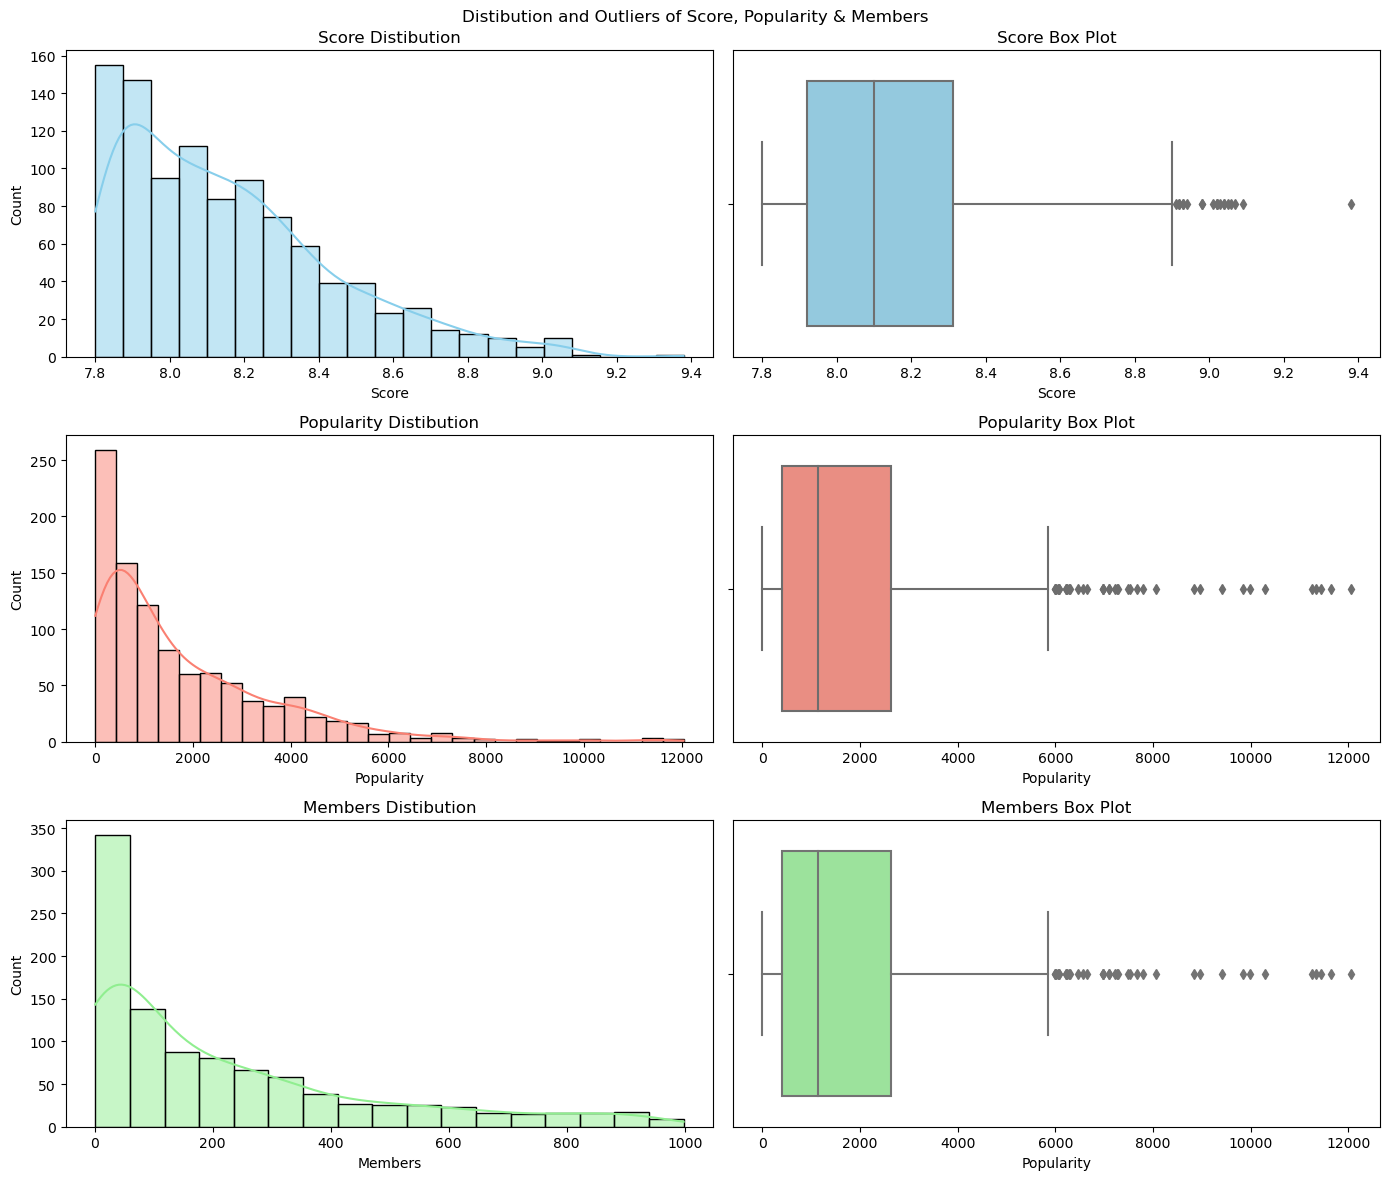

In [25]:
#Finding out the Distribution & outliers of Score, popularity and Members
fig, axes = plt.subplots(3,2,figsize=(14,12))
#Score
sns.histplot(data = anime_data, x = 'Score',kde = True, ax = axes[0,0],color = 'skyblue')
axes[0,0].set_title('Score Distibution')
sns.boxplot(data = anime_data, x = 'Score', ax = axes[0,1],color = 'skyblue')
axes[0,1].set_title('Score Box Plot')

#Popularity
sns.histplot(data = anime_data, x = 'Popularity',kde = True, ax = axes[1,0],color = 'Salmon')
axes[1,0].set_title('Popularity Distibution')
sns.boxplot(data = anime_data, x = 'Popularity', ax = axes[1,1],color = 'Salmon')
axes[1,1].set_title('Popularity Box Plot')

#Members
sns.histplot(data = anime_data, x = 'Members',kde = True, ax = axes[2,0],color = 'lightgreen')
axes[2,0].set_title('Members Distibution')
sns.boxplot(data = anime_data, x = 'Popularity', ax = axes[2,1],color = 'lightgreen')
axes[2,1].set_title('Members Box Plot')

fig.suptitle('Distibution and Outliers of Score, Popularity & Members')
plt.tight_layout()
plt.show()

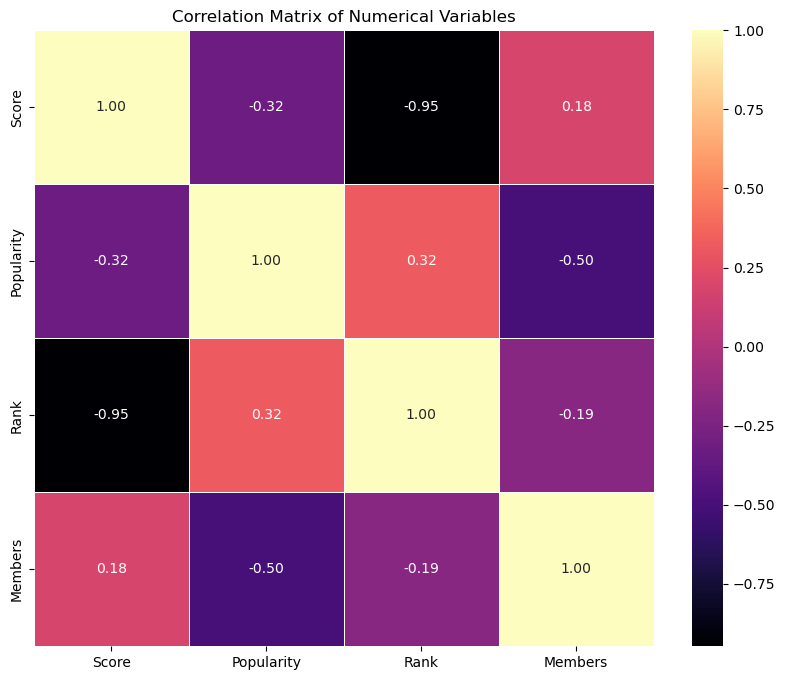

In [54]:
#correlation Matrix
Corr_data = anime_data2[['Score','Popularity','Rank','Members']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(Corr_data, annot = True, cmap = 'magma',linewidths = 0.5,fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

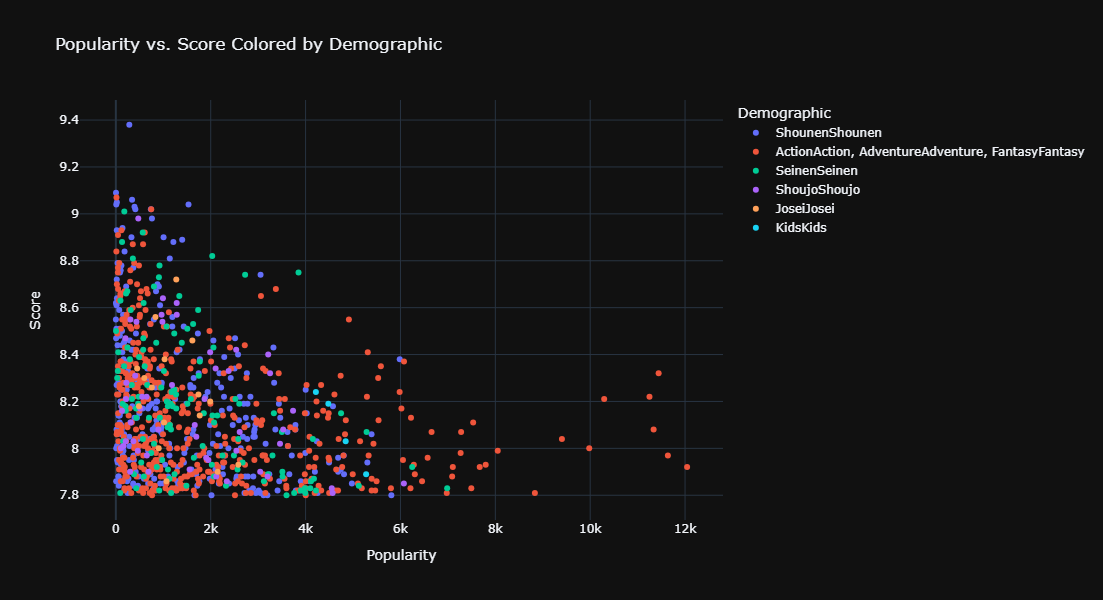

In [60]:
# scatter plots showing Popularity vs. Score colored by Demographic.
fig = px.scatter(anime_data2, x = 'Popularity',y = 'Score', color='Demographic', hover_name = 'English',title="Popularity vs. Score Colored by Demographic",
                labels={'Popularity': 'Popularity', 'Score': 'Score'},template = 'plotly_dark')
fig.update_layout(width=900, height=600)
fig.show()

In [62]:
#finding our Top 10 Genre
top_genres = anime_data2['Genres'].str.split(',').explode().str.strip().value_counts().head(10)
print("Top 10 Most Prevalent Genres:")
print(top_genres)

Top 10 Most Prevalent Genres:
Genres
ActionAction                346
DramaDrama                  278
FantasyFantasy              254
ComedyComedy                228
AdventureAdventure          221
ShounenShounen              214
Sci-FiSci-Fi                175
RomanceRomance              150
SupernaturalSupernatural    145
MysteryMystery              143
Name: count, dtype: int64


In [66]:
#finding out Top 10 Studios
top_studios = anime_data2['Studios'].str.split(',').explode().str.strip().value_counts().head(10)
print("Top 10 Studios Producing the Most Animes:")
print(top_studios)

Top 10 Studios Producing the Most Animes:
Studios
Madhouse             61
Production I.G       60
Sunrise              49
TMS Entertainment    48
Bones                40
A-1 Pictures         36
Kyoto Animation      36
Toei Animation       34
J.C.Staff            31
Shaft                30
Name: count, dtype: int64


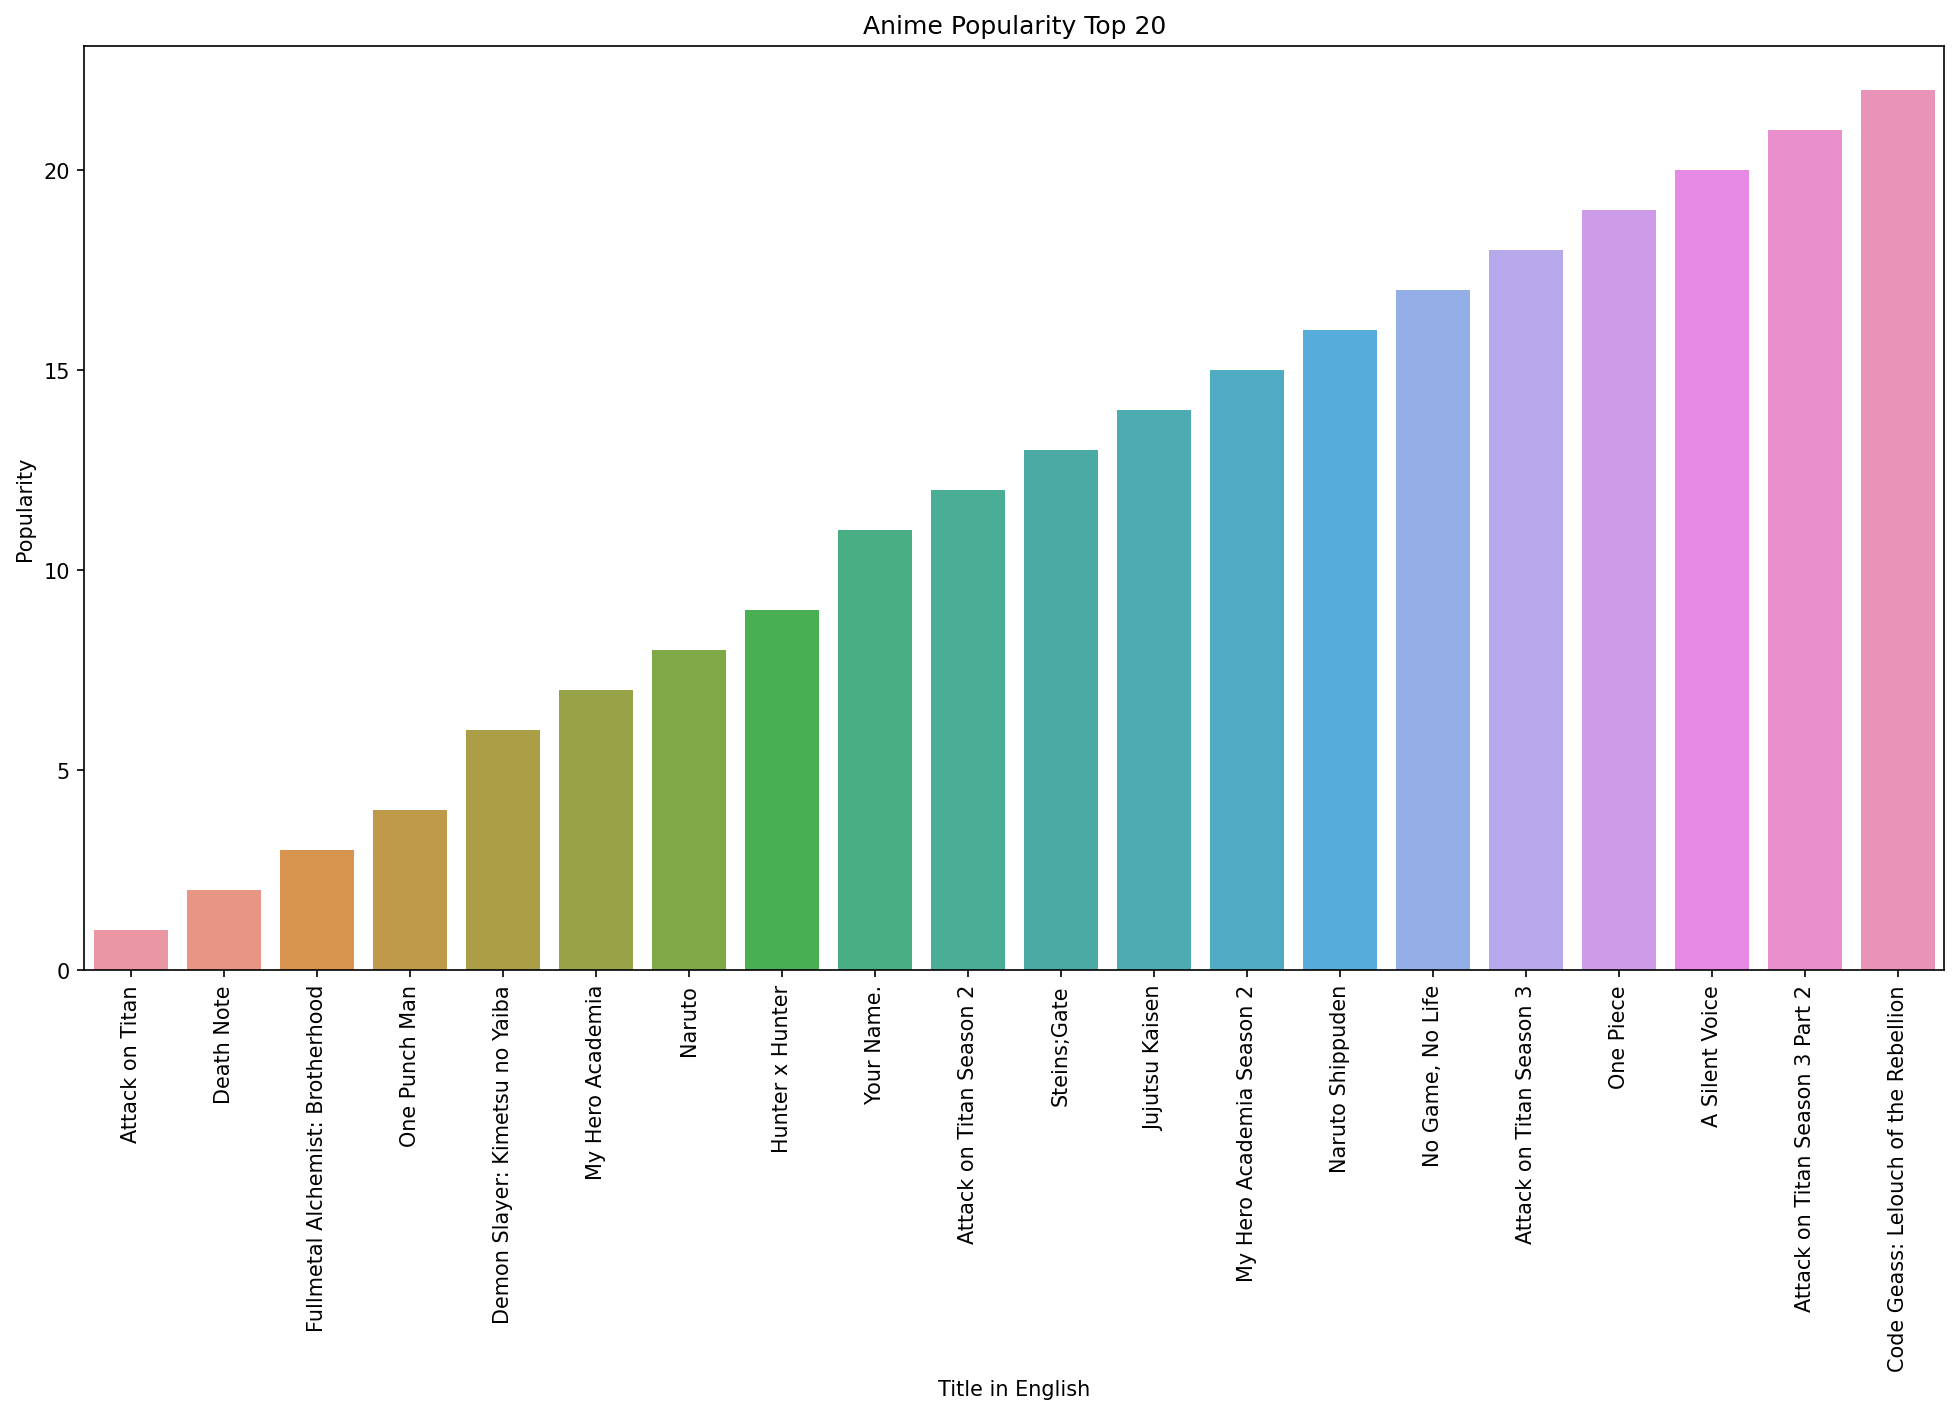

In [100]:
#anime Popularity
anime_popularity = anime_data2[['English','Popularity']]
anime_popularity_sort = anime_popularity.sort_values(by = 'Popularity',ascending = True).head(20)
plt.figure(figsize=(16,8),dpi = 150)
sns.barplot(data = anime_popularity_sort, x = 'English', y = 'Popularity')
plt.title('Anime Popularity Top 20')
plt.xlabel('Title in English')
plt.xticks(rotation=90)
plt.show()

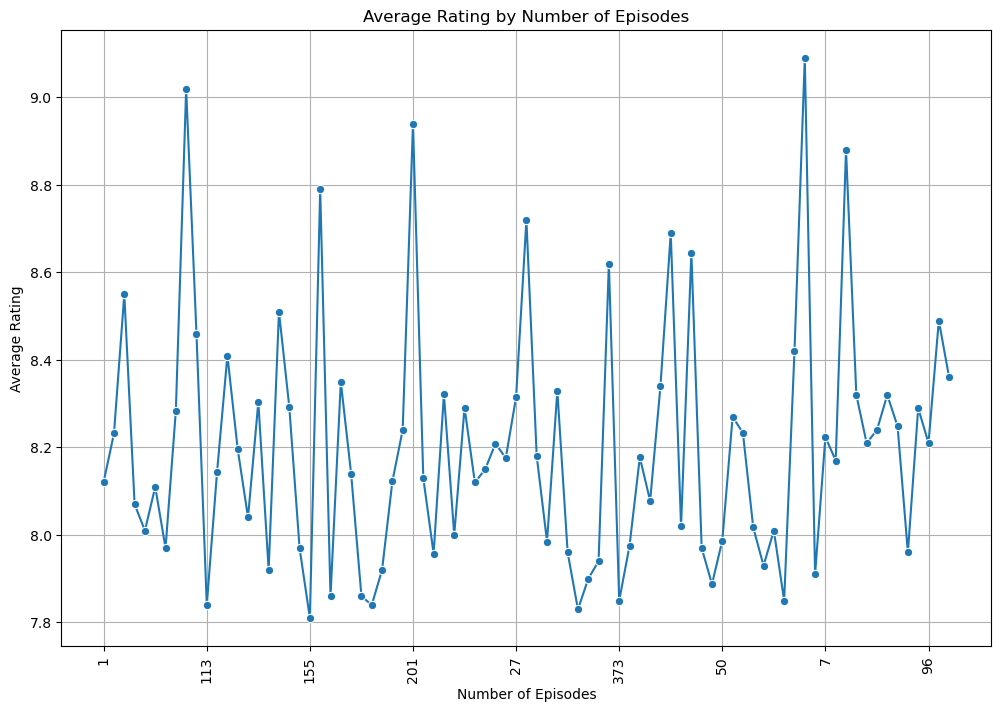

In [132]:
#average rating of anime with respect to episodes
average_rating = anime_data2.groupby('Episodes')['Score'].mean()
plt.figure(figsize=(12,8))
sns.lineplot(data = average_rating, x = average_rating.index, y = average_rating.values,marker = 'o')
plt.xlabel('Number of Episodes')
plt.ylabel('Average Rating')
plt.xticks(ticks=average_rating.index[::10], rotation=90)
plt.title('Average Rating by Number of Episodes')
plt.grid()
plt.show()

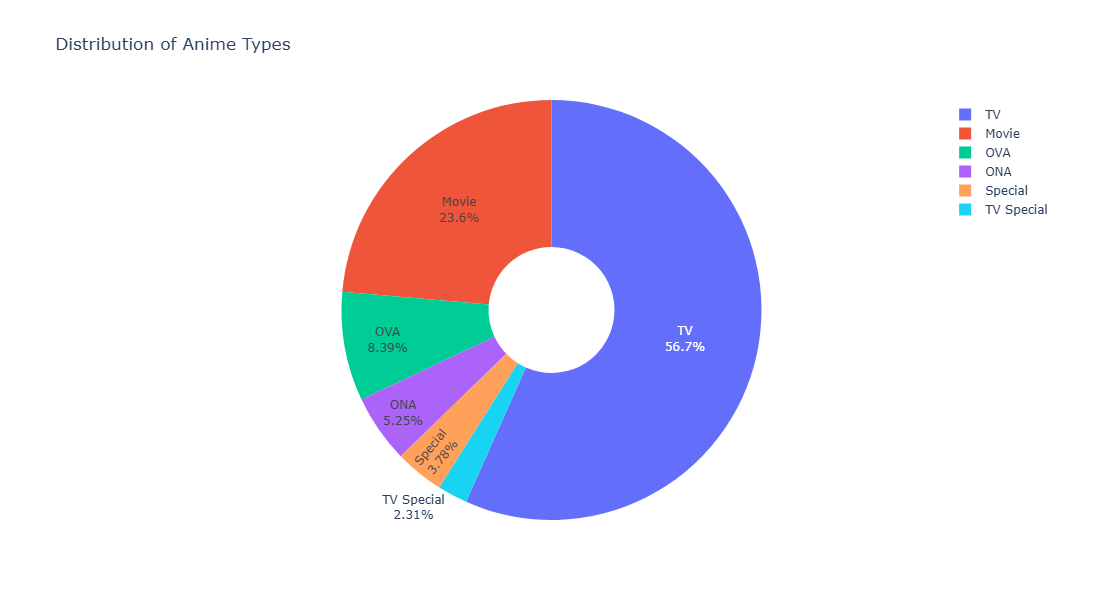

In [140]:
type_counts_df = type_counts.reset_index()
type_counts_df.columns = ['Type', 'Count']
fig = px.pie(type_counts_df, names='Type', values='Count', title='Distribution of Anime Types')
fig.update_traces(textinfo='percent+label', hole=0.3)
fig.update_layout(width=800, height=600)
fig.show()